In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
#from __future__ import division
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

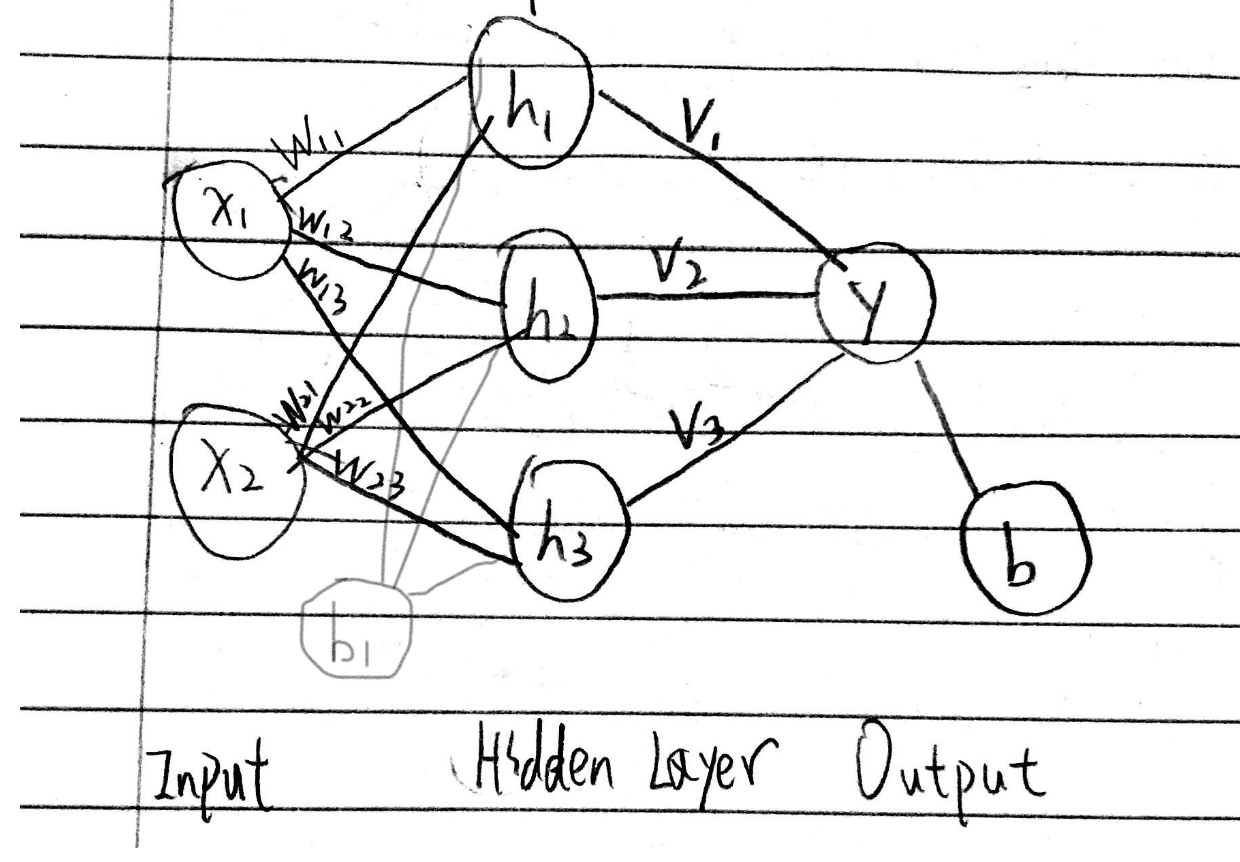

#### 2. Write out the mathematical equation for the output of this network (feel free to break the input-output relationship into multiple equations).

In_hi=w1i * x1 +w2i * x2 + b   for i =1,2,3 <br />
Out_hi=Max(0,In_hi) for i = 1,2,3<br />

In_O=Out_h1 * V1 + Out_h2 * V2 + Out_h3 * V3 +b<br />
Out_O=max(0,In_O)


#### what are the class probabilities associated with the forward pass of each sample?

In [3]:
def relu(x):
    return np.maximum(x,0)

def a(x,w,b):
    a_out = x.dot(w) + b
    return a_out

def sigmoid(z):
    s = 1/(1+np.exp(-z))
    return s

# Logistic unit
def logistic(x,w,b):
    s = sigmoid(a(x,w,b))
    y = np.round(s)
    return np.array([y,s]).T
def ff_nn_2_ReLu(X,parameters):
    W1,b1,b2,V = parameters
    In_hi = X.dot(W1) + b1
    Out_hi = relu(In_hi)
    In_O=Out_hi.dot(V)+b2
    Out_O =sigmoid(In_O)
    return Out_O


In [4]:
W1=np.array([[1,-1,0],[0,0,0.5]])
b1=np.array([0,0,1])
V=np.array([1,0,-1])
c = np.array([1])
#X = np.array([[1,0,0], [-1,-1,1]])

In [5]:
X1 = np.array([1,-1])
print('When input is (1,-1), output is ', ff_nn_2_ReLu(X1,(W1,b1,c,V)), 'it belongs to class',np.round(ff_nn_2_ReLu(X1,(W1,b1,c,V))) )

X2 = np.array([0,-1])
ff_nn_2_ReLu(X2,(W1,b1,c,V))
print('When input is (0,-1), output is ', ff_nn_2_ReLu(X2,(W1,b1,c,V)), 'it belongs to class',np.round(ff_nn_2_ReLu(X2,(W1,b1,c,V))) )

X3=np.array([0,1])
ff_nn_2_ReLu(X3,(W1,b1,c,V))
print('When input is (0,1), output is ', ff_nn_2_ReLu(X3,(W1,b1,c,V)), 'it belongs to class',np.round(ff_nn_2_ReLu(X3,(W1,b1,c,V))) )

When input is (1,-1), output is  [0.81757448] it belongs to class [1.]
When input is (0,-1), output is  [0.62245933] it belongs to class [1.]
When input is (0,1), output is  [0.37754067] it belongs to class [0.]


## 2 Gradient Descent

#### 1. What are the partial derivatives of f with respect to x and to y?

$\frac{\partial f}{\partial x}
   = \left( \frac{\partial ((1-x^3)+100*(y^2-x)^2)}{\partial x} \right)$= $-3x^2-200(y^2-x)$
<br />
$\frac{\partial f}{\partial y}
   = \left( \frac{\partial ((1-x^3)+100*(y^2-x)^2)}{\partial y} \right)$ =$400y(y^2-x)$
   

#### 2. Create a visualization of the contours of the Rosenbrock function.

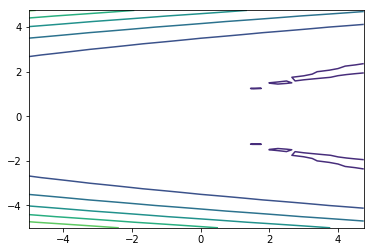

In [6]:
delta = 0.25
x = np.arange(-5.0, 5.0, delta)
y = np.arange(-5.0, 5.0, delta)
X, Y = np.meshgrid(x, y)
Z = (1-X**3) + 100*(Y**2-X)**2
fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)

#### 3. Write a Gradient Descent algorithm for fnding the minimum of the function. Visualize your results with a few different learning rates.

In [7]:
def grad_f(vector):
    x, y = vector
    df_dx = -3*x**2-200*(y**2-x)
    df_dy = 400*y*(y**2-x)
    return np.array([df_dx, df_dy])

def grad_descent(starting_point=None, iterations=10, learning_rate=12):
    if starting_point:
        point = starting_point
    else:
        point = np.random.uniform(-1,1,size=2)
        trajectory = [point]
    for i in range(iterations):
        grad = grad_f(point)
        point = point - learning_rate * grad
        trajectory.append(point)
    return np.array(trajectory)

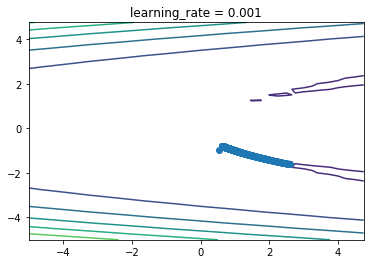

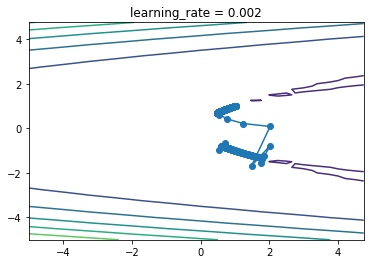

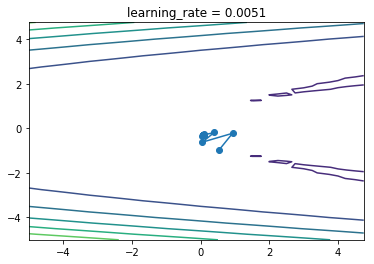

In [8]:
for l in [0.001, 0.002, 0.0051]:
    np.random.seed(10)
    traj = grad_descent(iterations=500, learning_rate=l)
#print(traj)
    fig, ax = plt.subplots()
    CS = ax.contour(X, Y, Z)
    x= traj[:,0]
    y= traj[:,1]
    plt.title('learning_rate = ' + str(l))
    plt.plot(x,y,'-o')

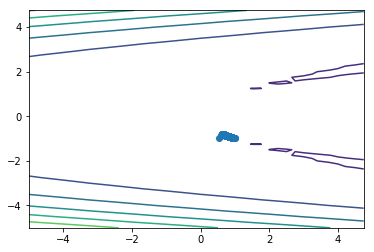

In [9]:
np.random.seed(10)
traj = grad_descent(iterations=500, learning_rate=0.0005)

fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)
x= traj[:,0]
y= traj[:,1]
plt.plot(x,y,'-o')

#### 4. Write a Gradient Descent With Momentum algorithm for fnding the mini- mum. Visualize your results with a few different settings of the algorithm's hyperparameters.

In [10]:
def grad_descent_with_momentum(starting_point=None, iterations=10, alpha=.9, epsilon=10):
    if starting_point:
        point = starting_point
    else:
        point = np.random.uniform(-1,1,size=2)
    trajectory = [point]
    v = np.zeros(point.size)
    for i in range(iterations):
        grad = grad_f(point)
        v = alpha*v + epsilon*grad
        point = point - v
        trajectory.append(point)
    return np.array(trajectory)

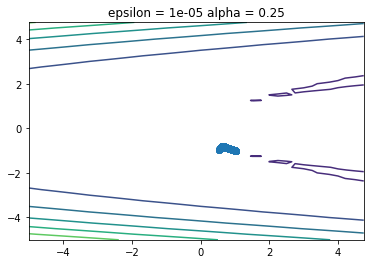

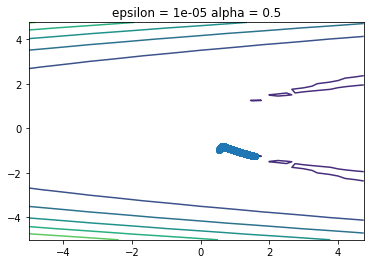

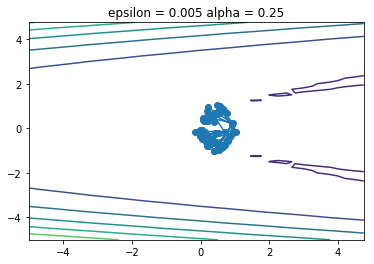

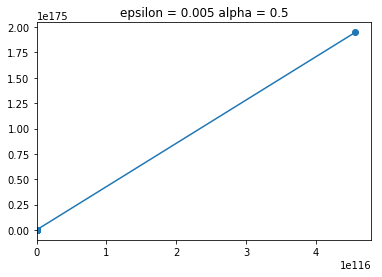

In [11]:
for l in [0.00001, 0.005]:
    for a in [0.25, 0.5]:
        np.random.seed(10)
        traj = grad_descent_with_momentum(iterations=20000, epsilon=l, alpha=a)
        fig, ax = plt.subplots()
        CS = ax.contour(X, Y, Z)
        x= traj[:,0]
        y= traj[:,1]
#print(x[0],y[0])
#print(x[-1],y[-1])
        plt.title('epsilon = '+str(l)+ ' alpha = '+ str(a))
        plt.plot(x,y,'-o')

## Backprop

#### 1. For the same network as in Question 1, derive expressions of the gradient of the Loss function with respect to each of the model parameters.

![loss.PNG](loss.PNG)

#### 2. Write a function grad f(...) that takes in a weights vector and returns the gradient of the Loss at that location.

In [64]:
def loss(y, y_hat):
    # binary cross entropy
    return np.average((-y * np.log(y_hat) - (1-y)*np.log(1-y_hat)))
def relu_derivative(x):
    return np.where(x>0, 1, 0)

def grad_f(params,x,y):
    W,v,b,c = params
    h = relu(np.dot(x, W) + b)
    y_hat = sigmoid(np.dot(h,v) + c)
    y = y.reshape(1000,1)
    d_c = (y_hat-y).sum()
    d_v = h.T.dot(y_hat-y)
    d_b = ((y_hat-y).dot(v.T)*relu_derivative(h)).sum(axis=0)
    d_W = x.T.dot((y_hat-y).dot(v.T)*relu_derivative(h))
    return (d_W,d_v,d_b,d_c)

In [73]:
def initialize_params():
    w1 = np.random.randn(6).reshape(2,3)
    w2 = np.random.randn(3).reshape(3,1)
    b1 = np.random.randn(3).reshape(1,3)
    b2 = np.random.randn(1)
    return (w1,w2,b1,b2)
p = initialize_params()

In [54]:
x = np.random.randn(1200).reshape((600,2))
y= np.random.randn(600).reshape((600,1))
grad_f(x,y,initialize_params())

(array([[  0.42420001,  13.47213953, 142.55451662],
        [ -0.97781358,  -5.34052529, -69.94005321]]),
 array([ -0.93573808,  -8.99241661, 170.14297058]),
 array([[ 81.66784522],
        [  3.92645325],
        [289.13580086]]),
 413.09699865691294)

#### 3. Generate a synthetic dataset like the XOR pattern (see below).

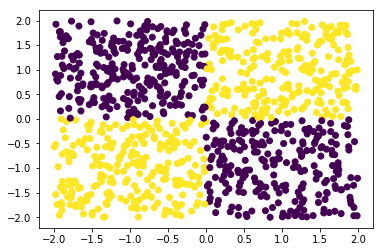

In [68]:
x = np.random.uniform(low=-2,high=2,size=(1000,2))
y=np.zeros(1000)
y[np.logical_and(x[:,0]>0 , x[:,1]>0)]=1
y[np.logical_and(x[:,0]<0 , x[:,1]<0)]=1
plt.scatter(x[:,0],x[:,1],c=y)

#### 4.Fit your network using Gradient Descent.  Keep track of the total Loss ateach iteration and plot the result.

In [83]:

def grad_descent(x, y, starting_point, iterations=10, learning_rate=1e-2):
    point = starting_point 
    trajectory = [point]
    losses = [loss(y, ff_nn_ReLu(x, point))]
    for i in range(iterations):
        grads = grad_f(point, x, y)
        update = []
        for (matrix, grad) in zip(point, grads):
            update.append(matrix - learning_rate*grad)
        point = tuple(update)
        trajectory.append(point)
        losses.append(loss(y, ff_nn_ReLu(x, point)))
    return (np.array(trajectory), losses)



Text(0, 0.5, 'Total Loss')

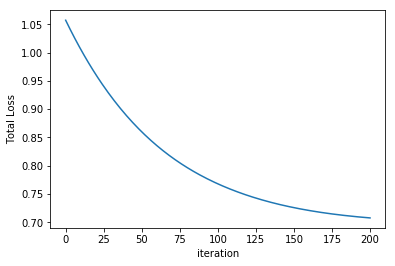

In [84]:
traj, losses = grad_descent(x, y, starting_point=p, iterations=200,learning_rate=1e-5)
plt.plot(losses)
plt.xlabel('iteration')
plt.ylabel('Total Loss')

####  5. Repeat the exercise above using Momentum. Comment on whether youralgorithm seems to converge more efficiently

In [87]:
def grad_descent_momentum(x, y, starting_point, iterations=10, learning_rate=1e-2,alpha=0.0001):
    point = starting_point 
    trajectory = [point]
    losses = [loss(y, ff_nn_ReLu(x, point))]
    prev=None
    for i in range(iterations):
        grads = grad_f(point, x, y)
        update = []
        if not prev:
            for (matrix, grad) in zip(point, grads):
                update.append(matrix - learning_rate*grad)
        else:
            for (matrix, grad) in zip(point, grads):
                update.append(matrix - learning_rate*grad - alpha*prev)
        prev = grads
        point = tuple(update)
        trajectory.append(point)
        losses.append(loss(y, ff_nn_ReLu(x, point)))
    return (np.array(trajectory), losses)

Text(0, 0.5, 'Total Loss')

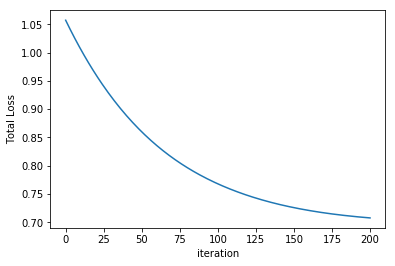

In [90]:
traj, losses = grad_descent(x, y, starting_point=p, iterations=200,learning_rate=1e-5)
plt.plot(losses)
plt.xlabel('iteration')
plt.ylabel('Total Loss')

It looks the same, there is no improvement

#### 6. Plot a visualization of the final decision boundary that your model has learned. Overlay the datapoints in this plot.


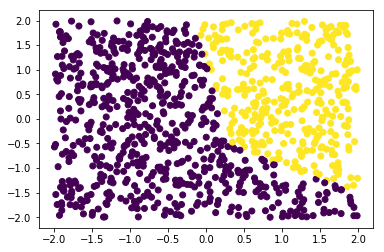

In [100]:
y_pred=ff_nn_ReLu(x, traj[-1])
y_pred[y_pred >=0.5] = 1
y_pred[y_pred < 0.5] = 0
plt.scatter(x[:,0],x[:,1],c=y_pred.reshape(1000))


In [105]:
def plot_decision_boundary(x,params):
    x_min, x_max = x[:, 0].min() - 1, x[:, 0].max() + 1
    y_min, y_max = x[:, 1].min() - 1, x[:, 1].max() + 1
    h = 0.2
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    _in=np.array([xx.ravel(), yy.ravel()]).T
    z=ff_nn_ReLu(_in,params)
    z=z>0.5
    z=z.reshape(xx.shape)
    plt.contourf(xx, yy, z, alpha=0.2)
    plt.scatter(x[:, 0], x[:, 1], c=np.squeeze(y))

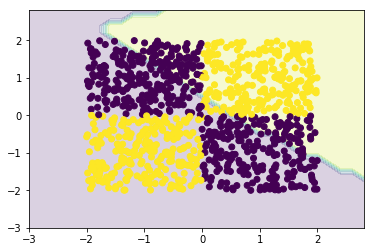

In [106]:
plot_decision_boundary(x,p)